# __Import Necessary Libraries__

In [1]:
import pandas as pd    # For handling data and Load CSV 
import numpy as np     # For numerical operations
import seaborn as sns  # Advanced statistical visualizations 
import matplotlib.pyplot as plt  # For plotting graphs and visualizing data
from sklearn.model_selection import train_test_split, GridSearchCV  #  To split your dataset into training and testing and To find the best hyperparameters for your model
from sklearn.preprocessing import StandardScaler, LabelEncoder  # To normalize/scale numerical features and To convert categorical labels into numeric values
from sklearn.ensemble import RandomForestClassifier  # Random Forest is a powerful ensemble model that combines many decision trees for better prediction
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb  # XGBoost is a high-performance ML library 


### Load the dataset

In [2]:
df=pd.read_excel(r"E:\AIML_Pratics_XEL_Files\HMS_Room_availability_prediction_classification.xlsx")
df.head()

,Room_ID,Room_Type,Hospital_Wing,Total_Beds,Occupied_Beds,Patient_Count,Room_Admission_Rate,Room_Transfer_Rate,Emergency_Cases,Staff_Availability,Seasonality_Factor,Room_Maintenance_Status,Average_Stay_Length,Admission_Requests,Room_Availability
0,Room_1,General,West,8,1,3,0,1,0,0,1.02,0,7,19,0
1,Room_2,Emergency,West,1,0,3,5,2,0,1,0.80,1,3,17,0
2,Room_3,Private,East,9,7,3,1,3,2,1,1.10,1,9,14,0
3,Room_4,Private,West,2,6,8,3,1,1,0,1.14,0,2,9,0
4,Room_5,ICU,West,7,9,5,0,3,2,1,1.06,1,9,11,0


# __1. Data Preprocessing & Cleaning__

In [3]:
# Check dataset shape
print("\nDataset Shape:", df.shape)


Dataset Shape: (5000, 15)


###  Identify and Handle missing values

In [4]:
print(df.isnull().sum())

Room_ID                    0
Room_Type                  0
Hospital_Wing              0
Total_Beds                 0
Occupied_Beds              0
Patient_Count              0
Room_Admission_Rate        0
Room_Transfer_Rate         0
Emergency_Cases            0
Staff_Availability         0
Seasonality_Factor         0
Room_Maintenance_Status    0
Average_Stay_Length        0
Admission_Requests         0
Room_Availability          0
dtype: int64


In [5]:
#df.fillna(df.mean(), inplace=True)

In [6]:
print(df.dtypes)

Room_ID                     object
Room_Type                   object
Hospital_Wing               object
Total_Beds                   int64
Occupied_Beds                int64
Patient_Count                int64
Room_Admission_Rate          int64
Room_Transfer_Rate           int64
Emergency_Cases              int64
Staff_Availability           int64
Seasonality_Factor         float64
Room_Maintenance_Status      int64
Average_Stay_Length          int64
Admission_Requests           int64
Room_Availability            int64
dtype: object


### Visualizing missing values using libraries like missingo

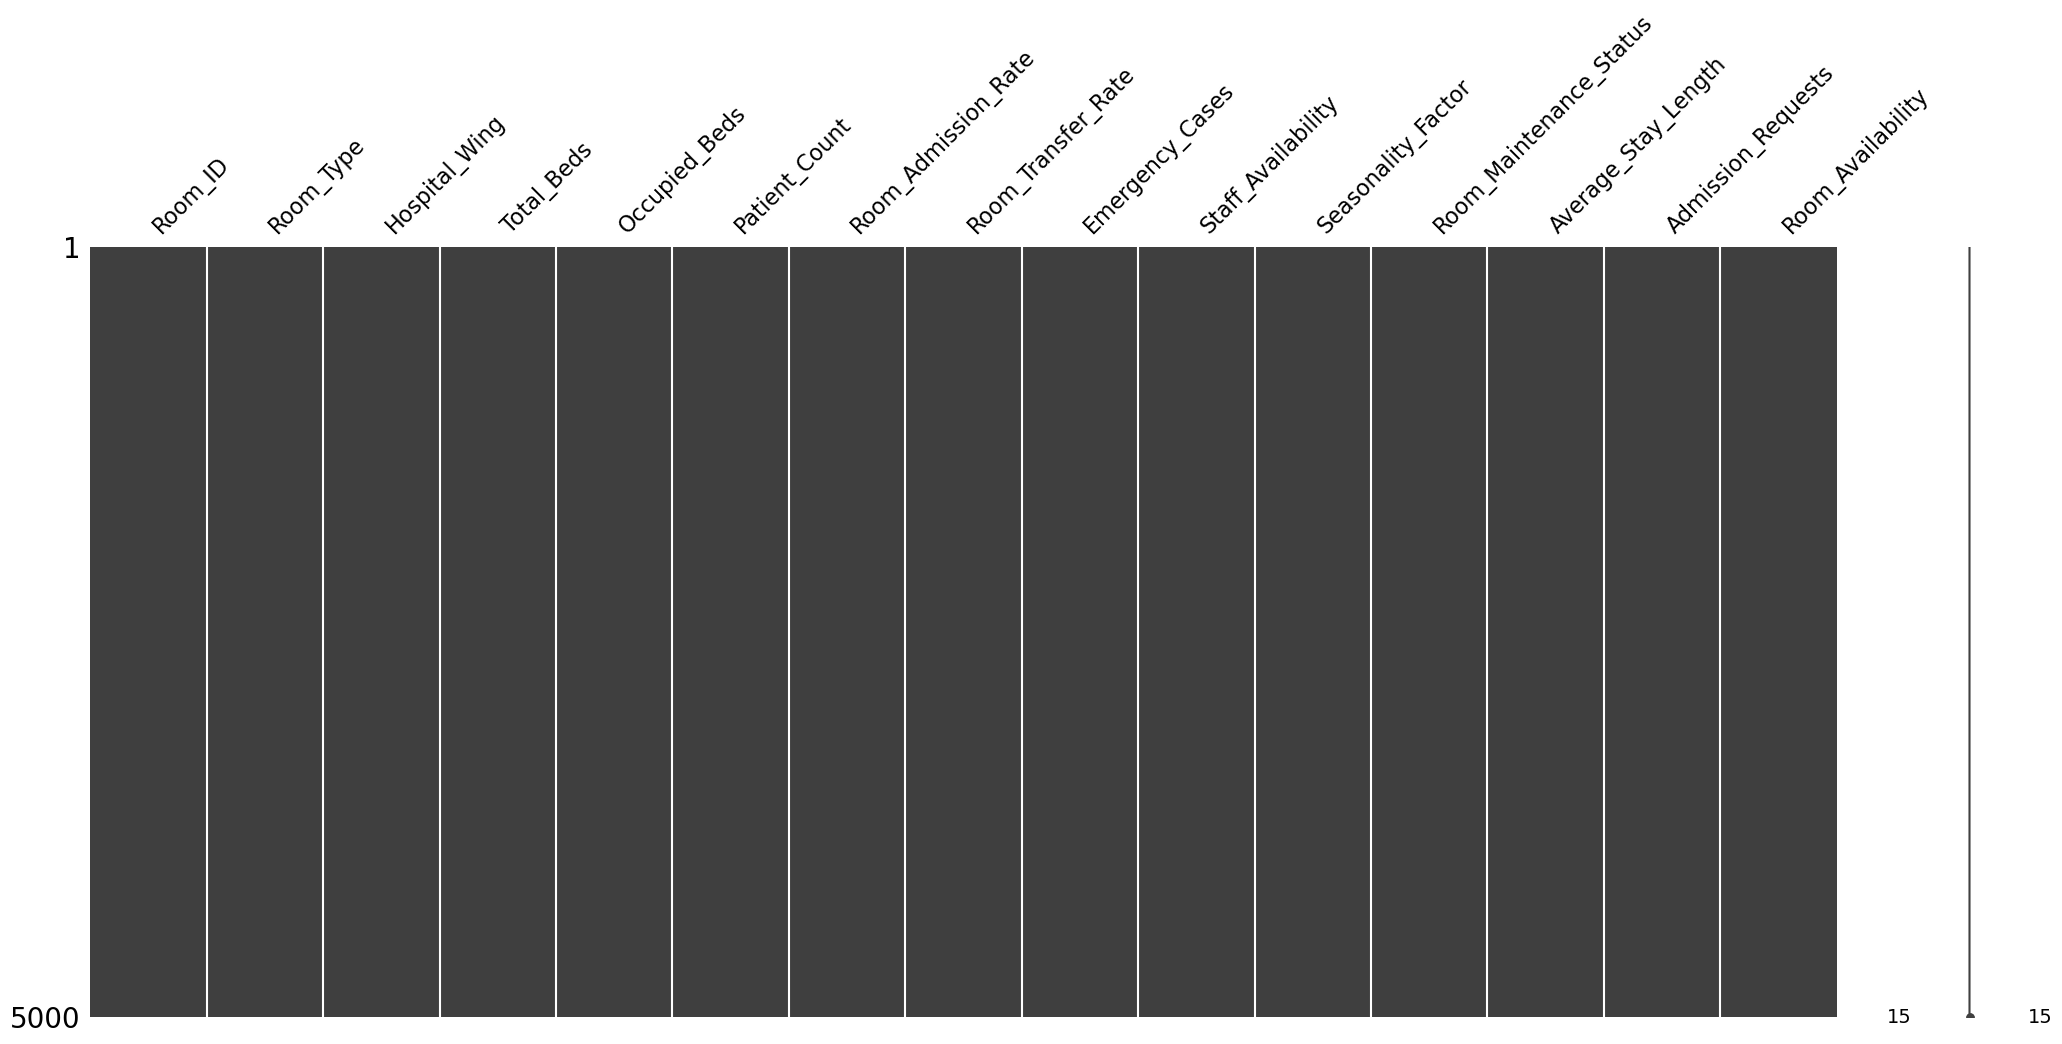

In [7]:
import missingno as msno
msno.matrix(df)

# Show plot
plt.show()

### Check for duplicates rows

In [8]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Optionally, drop them
df = df.drop_duplicates()


Number of duplicate rows: 0


### Check unique values in each column

In [9]:
# Check unique values in each column
print("\nUnique Values per Column:\n", df.nunique())



Unique Values per Column:
 Room_ID                    5000
Room_Type                     4
Hospital_Wing                 4
Total_Beds                   10
Occupied_Beds                11
Patient_Count                11
Room_Admission_Rate           6
Room_Transfer_Rate            4
Emergency_Cases               3
Staff_Availability            2
Seasonality_Factor           41
Room_Maintenance_Status       2
Average_Stay_Length          10
Admission_Requests           21
Room_Availability             2
dtype: int64


### Identify Categorical and Numerical columns

In [10]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Drop Room_ID from categorical features since it's just an identifier
if "Room_ID" in categorical_cols:
    categorical_cols.remove("Room_ID")
    df.drop(columns=["Room_ID"], inplace=True)


print('Categorical_cols: ',categorical_cols)
print('Numerical columns: ',numerical_cols)

Categorical_cols:  ['Room_Type', 'Hospital_Wing']
Numerical columns:  ['Total_Beds', 'Occupied_Beds', 'Patient_Count', 'Room_Admission_Rate', 'Room_Transfer_Rate', 'Emergency_Cases', 'Staff_Availability', 'Seasonality_Factor', 'Room_Maintenance_Status', 'Average_Stay_Length', 'Admission_Requests', 'Room_Availability']


### Understanding the target variable

In [11]:
if 'Room_Availability' in df.columns:
    print("\nTarget Variable Distribution:")
    print(df['Room_Availability'].value_counts())
else:
    print("\nTarget variable 'Room_Availability' not found in dataset.")



Target Variable Distribution:
Room_Availability
0    4758
1     242
Name: count, dtype: int64


## Standardize & Normalize Features

### Encode the categorical columns by one-hot encoding


In [12]:
df_encoded = pd.get_dummies(df, columns=['Room_Type', 'Hospital_Wing'], drop_first=True)


In [13]:
df_encoded.head()

,Total_Beds,Occupied_Beds,Patient_Count,Room_Admission_Rate,Room_Transfer_Rate,Emergency_Cases,Staff_Availability,Seasonality_Factor,Room_Maintenance_Status,Average_Stay_Length,Admission_Requests,Room_Availability,Room_Type_General,Room_Type_ICU,Room_Type_Private,Hospital_Wing_North,Hospital_Wing_South,Hospital_Wing_West
0,8,1,3,0,1,0,0,1.02,0,7,19,0,True,False,False,False,False,True
1,1,0,3,5,2,0,1,0.80,1,3,17,0,False,False,False,False,False,True
2,9,7,3,1,3,2,1,1.10,1,9,14,0,False,False,True,False,False,False
3,2,6,8,3,1,1,0,1.14,0,2,9,0,False,False,True,False,False,True
4,7,9,5,0,3,2,1,1.06,1,9,11,0,False,True,False,False,False,True


In [14]:
df_encoded.nunique()

Total_Beds                 10
Occupied_Beds              11
Patient_Count              11
Room_Admission_Rate         6
Room_Transfer_Rate          4
Emergency_Cases             3
Staff_Availability          2
Seasonality_Factor         41
Room_Maintenance_Status     2
Average_Stay_Length        10
Admission_Requests         21
Room_Availability           2
Room_Type_General           2
Room_Type_ICU               2
Room_Type_Private           2
Hospital_Wing_North         2
Hospital_Wing_South         2
Hospital_Wing_West          2
dtype: int64

In [15]:
df_encoded.dtypes

Total_Beds                   int64
Occupied_Beds                int64
Patient_Count                int64
Room_Admission_Rate          int64
Room_Transfer_Rate           int64
Emergency_Cases              int64
Staff_Availability           int64
Seasonality_Factor         float64
Room_Maintenance_Status      int64
Average_Stay_Length          int64
Admission_Requests           int64
Room_Availability            int64
Room_Type_General             bool
Room_Type_ICU                 bool
Room_Type_Private             bool
Hospital_Wing_North           bool
Hospital_Wing_South           bool
Hospital_Wing_West            bool
dtype: object

### Encoding categorical columns using Labelled encoding

In [16]:
categorical_cols = df_encoded.select_dtypes(include=['object','bool', 'category'])

print(df_encoded.select_dtypes(include=['object', 'category']).columns)

# Label Encoding for Categorical Columns
for col in categorical_cols:
    encoder = LabelEncoder()
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

print("\nEncoded Categorical Features:\n")
print(df_encoded.head())

Index([], dtype='object')

Encoded Categorical Features:

   Total_Beds  Occupied_Beds  Patient_Count  Room_Admission_Rate  \
0           8              1              3                    0   
1           1              0              3                    5   
2           9              7              3                    1   
3           2              6              8                    3   
4           7              9              5                    0   

   Room_Transfer_Rate  Emergency_Cases  Staff_Availability  \
0                   1                0                   0   
1                   2                0                   1   
2                   3                2                   1   
3                   1                1                   0   
4                   3                2                   1   

   Seasonality_Factor  Room_Maintenance_Status  Average_Stay_Length  \
0                1.02                        0                    7   
1                0

### Visualizing correlation among features

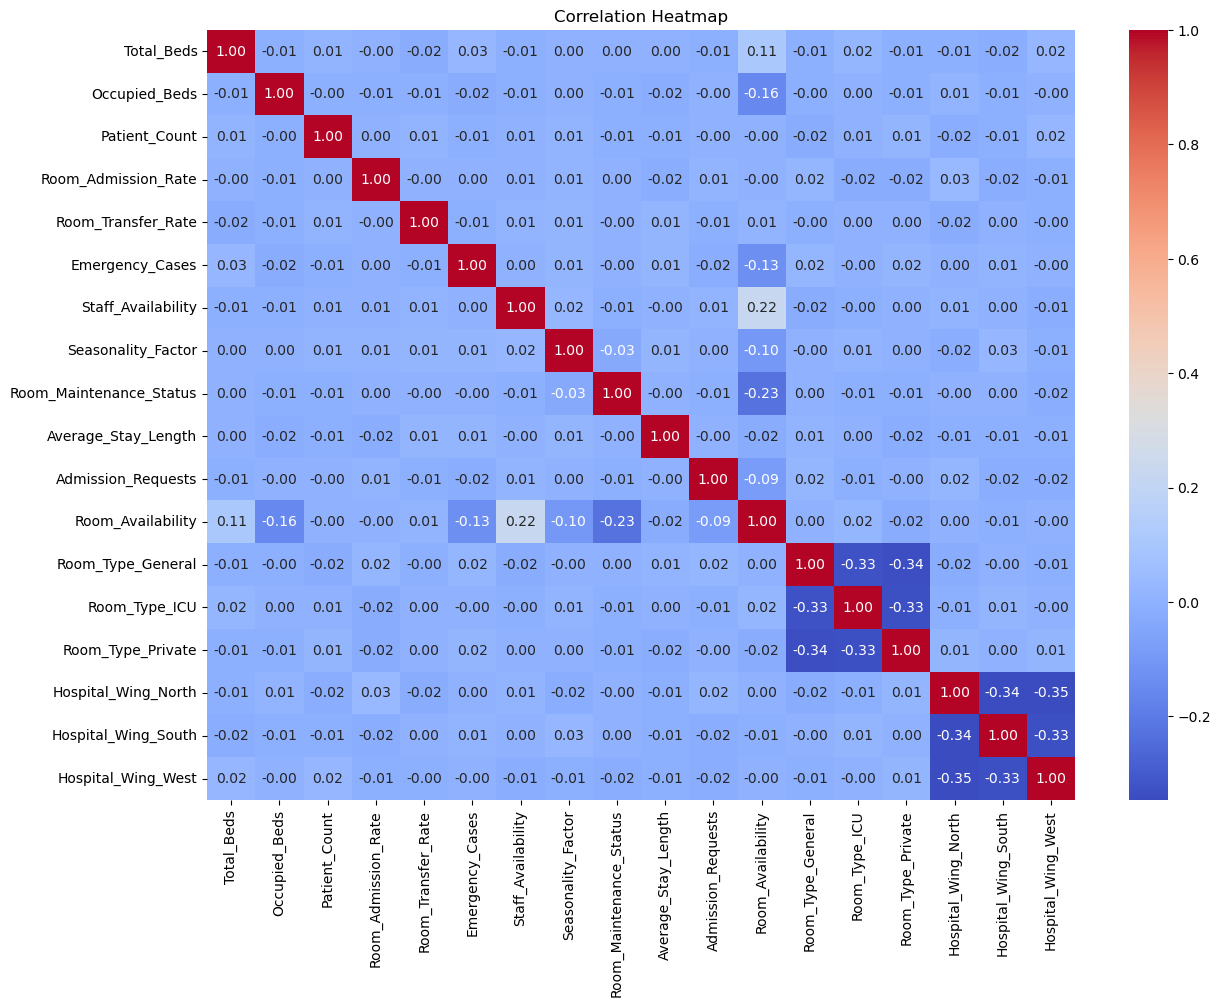

In [17]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Outlier Detection and Handling

In [18]:
# # Select only numeric columns
numeric_cols = df_encoded.select_dtypes(include=["number"]).columns

# Detect outliers using IQR for numeric columns only
outliers_iqr = {}
for col in numeric_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers =df_encoded[(df_encoded[col] < lower_bound) | (df_encoded[col] > upper_bound)]
    outliers_iqr[col] = len(outliers)

# Print outliers count
print("\nOutliers detected using IQR (Numeric Columns Only):")
for col, count in outliers_iqr.items():
    print(f"{col}: {count} outliers")


Outliers detected using IQR (Numeric Columns Only):
Total_Beds: 0 outliers
Occupied_Beds: 0 outliers
Patient_Count: 0 outliers
Room_Admission_Rate: 0 outliers
Room_Transfer_Rate: 0 outliers
Emergency_Cases: 0 outliers
Staff_Availability: 0 outliers
Seasonality_Factor: 0 outliers
Room_Maintenance_Status: 0 outliers
Average_Stay_Length: 0 outliers
Admission_Requests: 0 outliers
Room_Availability: 242 outliers
Room_Type_General: 1249 outliers
Room_Type_ICU: 1217 outliers
Room_Type_Private: 0 outliers
Hospital_Wing_North: 0 outliers
Hospital_Wing_South: 1244 outliers
Hospital_Wing_West: 0 outliers


### Cap the outliers (Winsorization)

In [19]:
# # Outlier Detection and Handling (using box plots for visualization and IQR method for handling)
# # Outlier Detection and Handling (IQR Method)
# for col in numerical_cols:
#     plt.figure(figsize=(8, 6))
#     room_df.boxplot(column=[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

#     Q1 = room_df[col].quantile(0.25)
#     Q3 = room_df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Only apply clipping if outliers exist
#     if (room_df[col] < lower_bound).sum() > 0 or (room_df[col] > upper_bound).sum() > 0:
#         print(f'Outliers detected in {col}, applying Winsorization.')
#         room_df[col] = room_df[col].clip(lower=lower_bound, upper=upper_bound)


# room_df.head()


### IQR-based outlier handling

In [20]:
# Identify binary columns (only 0s and 1s)
binary_cols = [col for col in df_encoded.columns if set(df_encoded[col].unique()) <= {0, 1}]

# Apply IQR-based outlier detection only to numerical columns excluding binary
numeric_cols = df_encoded.select_dtypes(include='number').columns
outlier_cols = [col for col in numeric_cols if col not in binary_cols and col != 'Room_Availability']


In [21]:
def cap_outliers(df_encoded, column):
    Q1 = df_encoded[column].quantile(0.25)
    Q3 = df_encoded[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_encoded[column] = np.where(df_encoded[column] < lower, lower, df_encoded[column])
    df_encoded[column] = np.where(df_encoded[column] > upper, upper, df_encoded[column])
    return df_encoded

for col in outlier_cols:
    df_encoded = cap_outliers(df_encoded, col)


In [22]:
df_encoded.head()

,Total_Beds,Occupied_Beds,Patient_Count,Room_Admission_Rate,Room_Transfer_Rate,Emergency_Cases,Staff_Availability,Seasonality_Factor,Room_Maintenance_Status,Average_Stay_Length,Admission_Requests,Room_Availability,Room_Type_General,Room_Type_ICU,Room_Type_Private,Hospital_Wing_North,Hospital_Wing_South,Hospital_Wing_West
0,8.0,1.0,3.0,0.0,1.0,0.0,0,1.02,0,7.0,19.0,0,1,0,0,0,0,1
1,1.0,0.0,3.0,5.0,2.0,0.0,1,0.80,1,3.0,17.0,0,0,0,0,0,0,1
2,9.0,7.0,3.0,1.0,3.0,2.0,1,1.10,1,9.0,14.0,0,0,0,1,0,0,0
3,2.0,6.0,8.0,3.0,1.0,1.0,0,1.14,0,2.0,9.0,0,0,0,1,0,0,1
4,7.0,9.0,5.0,0.0,3.0,2.0,1,1.06,1,9.0,11.0,0,0,1,0,0,0,1


## Feature Engineering

### Feature Scaling

In [23]:
# Separate features and target variable
target_col = "Room_Availability"

#Identify numerical columns (excluding target)
numeric_cols =df_encoded.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove(target_col)  # Exclude target from scaling

# Scale only numerical columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded[numeric_cols]), columns=numeric_cols)

# Add back target variable
df_scaled[target_col] = df_encoded[target_col]

print("\nScaled Numerical Features:")
print(df_scaled.head())


Scaled Numerical Features:
   Total_Beds  Occupied_Beds  Patient_Count  Room_Admission_Rate  \
0    0.893056      -1.253616      -0.610748            -1.470260   
1   -1.550994      -1.572164      -0.610748             1.434244   
2    1.242206       0.657675      -0.610748            -0.889359   
3   -1.201844       0.339127       0.987901             0.272442   
4    0.543906       1.294772       0.028712            -1.470260   

   Room_Transfer_Rate  Emergency_Cases  Staff_Availability  \
0           -0.440079        -1.207585           -1.005616   
1            0.452939        -1.207585            0.994416   
2            1.345957         1.233460            0.994416   
3           -0.440079         0.012938           -1.005616   
4            1.345957         1.233460            0.994416   

   Seasonality_Factor  Room_Maintenance_Status  Average_Stay_Length  \
0            0.186732                -1.010859             0.507250   
1           -1.712007                 0.989258  

# __Exploratory Data Analysis (EDA)__

## (a) Generate Summary Statistics (mean, median, mode, variance)

In [24]:
# Display summary statistics
print("\nSummary Statistics:")
print(df_scaled.describe(include='all'))


Summary Statistics:
         Total_Beds  Occupied_Beds  Patient_Count  Room_Admission_Rate  \
count  5.000000e+03   5.000000e+03   5.000000e+03         5.000000e+03   
mean   1.229239e-16   1.371347e-16   9.663381e-17        -8.668621e-17   
std    1.000100e+00   1.000100e+00   1.000100e+00         1.000100e+00   
min   -1.550994e+00  -1.572164e+00  -1.569937e+00        -1.470260e+00   
25%   -8.526942e-01  -9.350671e-01  -9.304777e-01        -8.893592e-01   
50%   -1.543941e-01   2.057823e-02   2.871174e-02         2.724425e-01   
75%    8.930559e-01   9.762236e-01   9.879012e-01         8.533433e-01   
max    1.591356e+00   1.613320e+00   1.627361e+00         1.434244e+00   

       Room_Transfer_Rate  Emergency_Cases  Staff_Availability  \
count        5.000000e+03     5.000000e+03        5.000000e+03   
mean         5.186962e-17     7.531753e-17       -4.263256e-17   
std          1.000100e+00     1.000100e+00        1.000100e+00   
min         -1.333097e+00    -1.207585e+00      

In [25]:
# Median
print("Median:\n", df_scaled.median(numeric_only=True))

# Mode
print("\nMode:\n", df_scaled.mode(numeric_only=True).iloc[0])

# Variance
print("\nVariance:\n", df_scaled.var(numeric_only=True))


Median:
 Total_Beds                -0.154394
Occupied_Beds              0.020578
Patient_Count              0.028712
Room_Admission_Rate        0.272442
Room_Transfer_Rate        -0.440079
Emergency_Cases            0.012938
Staff_Availability         0.994416
Seasonality_Factor         0.014120
Room_Maintenance_Status    0.989258
Average_Stay_Length        0.162323
Admission_Requests        -0.003766
Room_Type_General         -0.577042
Room_Type_ICU             -0.567188
Room_Type_Private         -0.584741
Hospital_Wing_North       -0.597679
Hospital_Wing_South       -0.575503
Hospital_Wing_West        -0.578890
Room_Availability          0.000000
dtype: float64

Mode:
 Total_Beds                -1.550994
Occupied_Beds              0.339127
Patient_Count             -0.610748
Room_Admission_Rate        1.434244
Room_Transfer_Rate        -0.440079
Emergency_Cases           -1.207585
Staff_Availability         0.994416
Seasonality_Factor         0.531958
Room_Maintenance_Status    0.989

## (b) Visualize Distributions

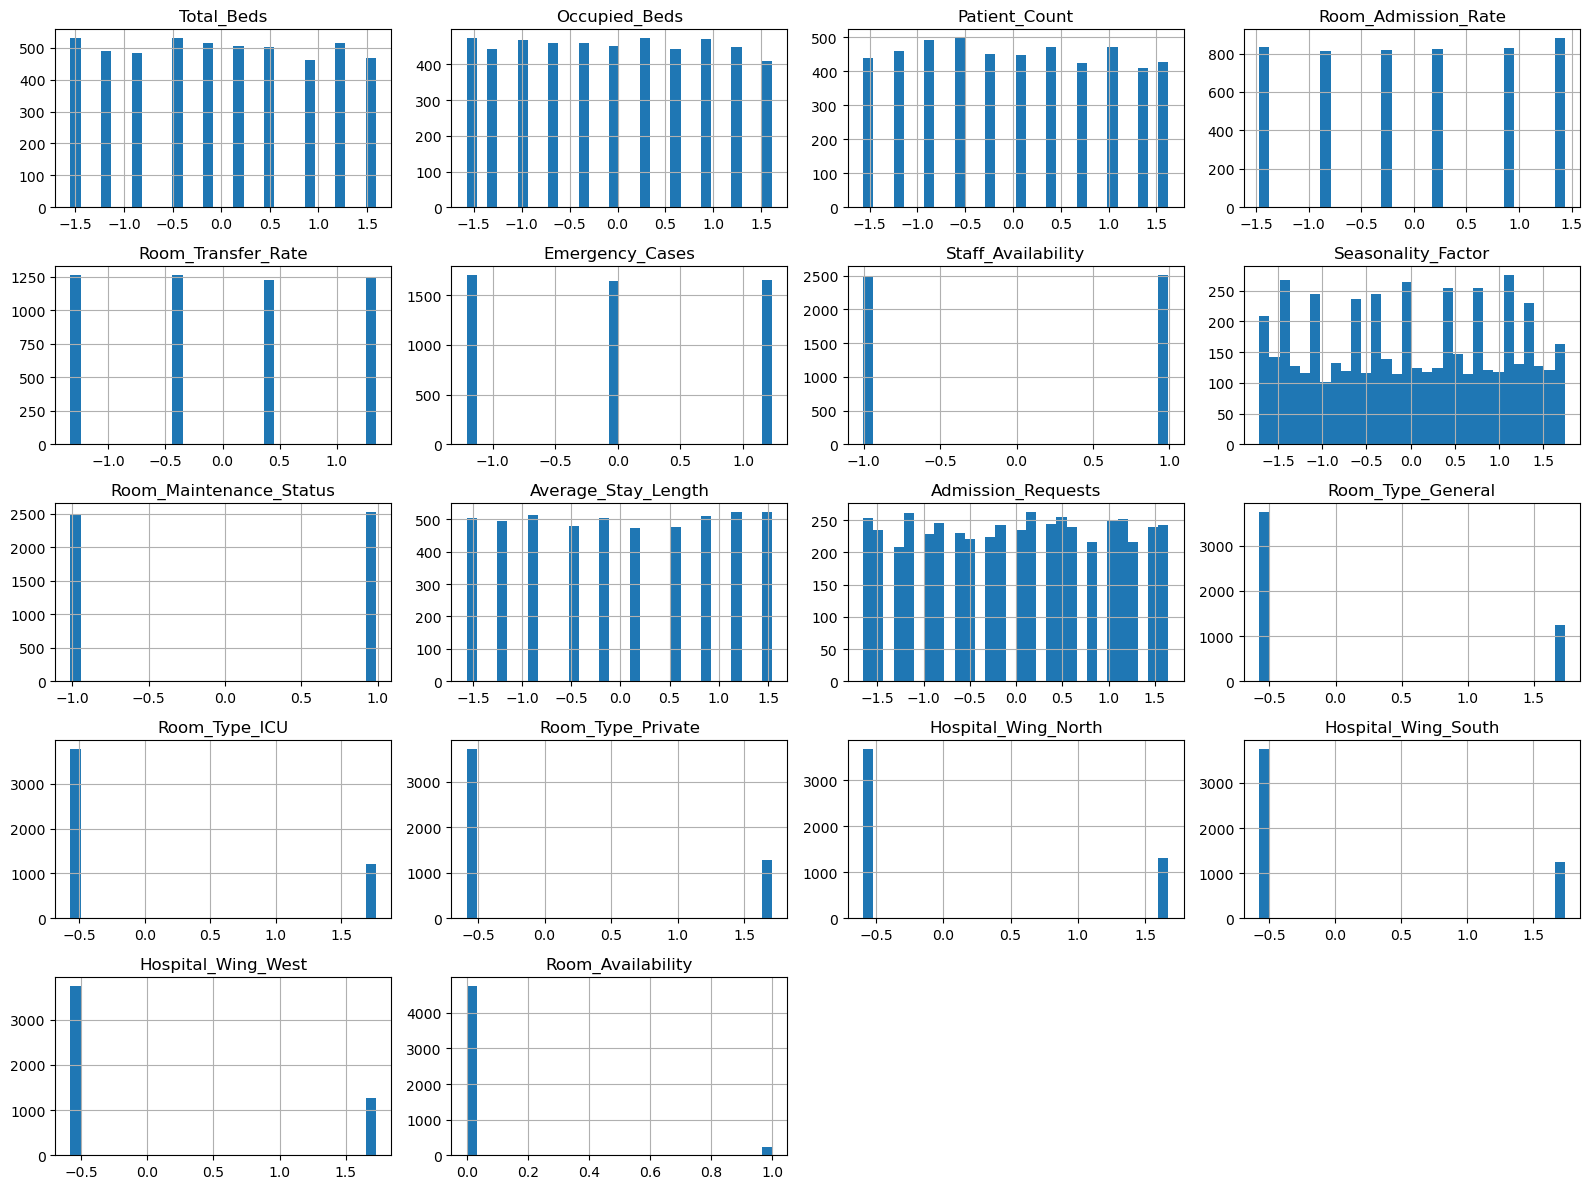

In [26]:
import matplotlib.pyplot as plt
df_scaled.hist(figsize=(16, 12), bins=30)
plt.tight_layout()
plt.show()


### Boxplots for outliers and spread:

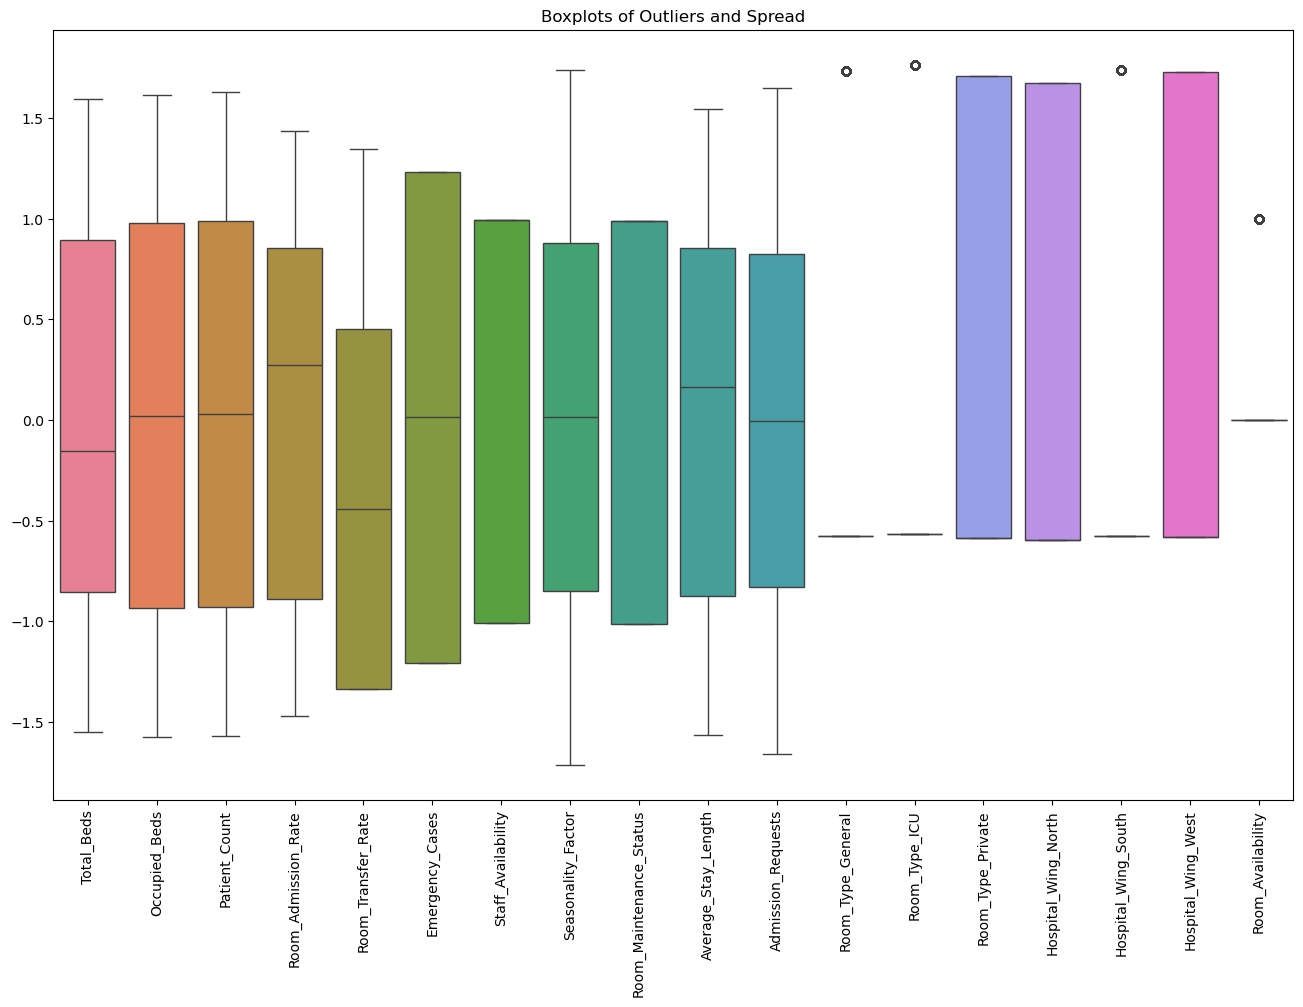

In [27]:
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.boxplot(data=df_scaled.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Boxplots of Outliers and Spread")
plt.show()


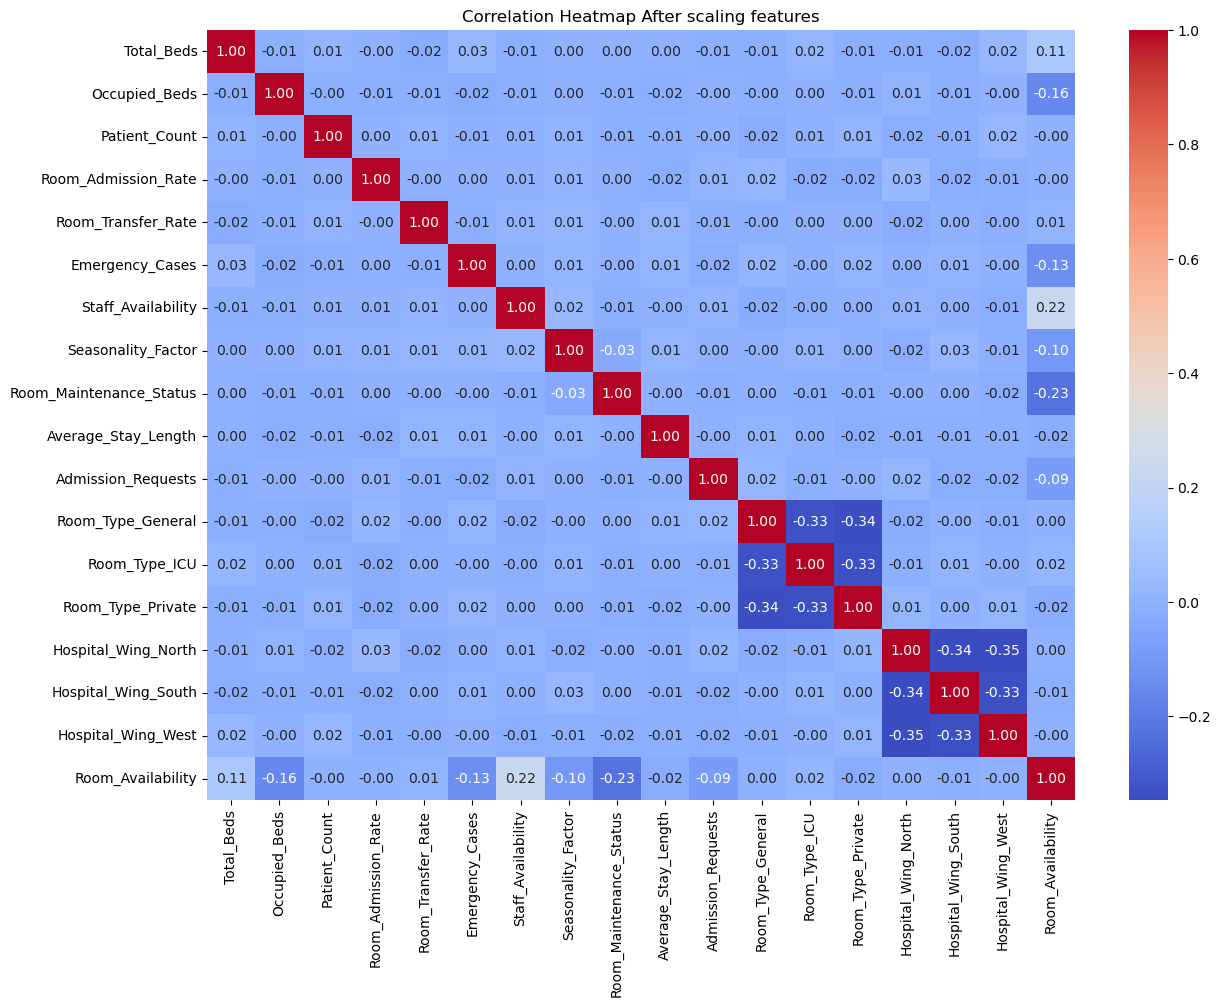

In [28]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap After scaling features")
plt.show()


In [29]:
df_scaled.dtypes

Total_Beds                 float64
Occupied_Beds              float64
Patient_Count              float64
Room_Admission_Rate        float64
Room_Transfer_Rate         float64
Emergency_Cases            float64
Staff_Availability         float64
Seasonality_Factor         float64
Room_Maintenance_Status    float64
Average_Stay_Length        float64
Admission_Requests         float64
Room_Type_General          float64
Room_Type_ICU              float64
Room_Type_Private          float64
Hospital_Wing_North        float64
Hospital_Wing_South        float64
Hospital_Wing_West         float64
Room_Availability            int64
dtype: object

In [30]:
# Select only numerical features for dimensionality reduction
numeric_cols =df_scaled.select_dtypes(include=['number'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_cols)
scaled_features

array([[ 0.89305594, -1.25361558, -0.61074792, ..., -0.57550274,
         1.72744428, -0.2255254 ],
       [-1.55099424, -1.57216404, -0.61074792, ..., -0.57550274,
         1.72744428, -0.2255254 ],
       [ 1.24220596,  0.65767514, -0.61074792, ..., -0.57550274,
        -0.57888987, -0.2255254 ],
       ...,
       [-1.55099424, -0.61651868,  0.02871174, ..., -0.57550274,
         1.72744428, -0.2255254 ],
       [-0.85269419, -0.61651868, -1.25020757, ..., -0.57550274,
        -0.57888987, -0.2255254 ],
       [-0.15439414,  0.02057823,  0.66817139, ..., -0.57550274,
         1.72744428, -0.2255254 ]])

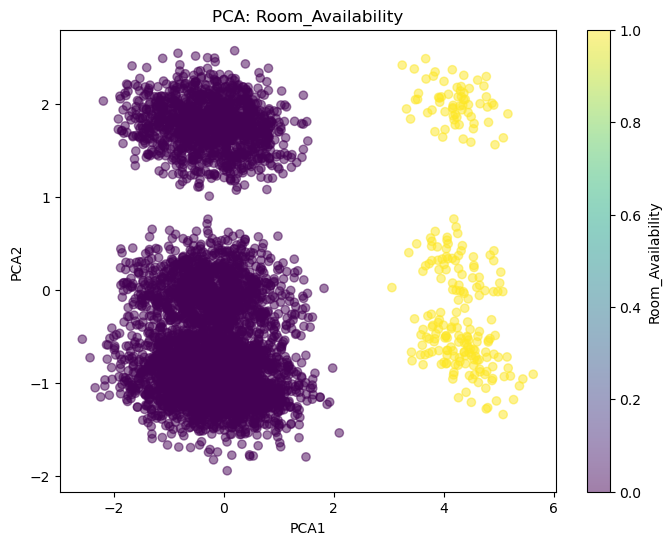

In [31]:
# PCA(Principal Component Analysis) is a technique to reduce dimensionality:

from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Add PCA results to DataFrame
df_scaled["PCA1"] = pca_result[:, 0]
df_scaled["PCA2"] = pca_result[:, 1]

# Plot PCA components
plt.figure(figsize=(8,6))
plt.scatter(df_scaled["PCA1"], df_scaled["PCA2"], alpha=0.5, c=df_scaled["Room_Availability"])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA: Room_Availability")
plt.colorbar(label="Room_Availability")
plt.show()

## (e)Feature Selection

### Recursive Feature Elimination (RFE)

In [32]:
df_final=df_scaled.copy()

In [33]:
df_final.head()

,Total_Beds,Occupied_Beds,Patient_Count,Room_Admission_Rate,Room_Transfer_Rate,Emergency_Cases,Staff_Availability,Seasonality_Factor,Room_Maintenance_Status,Average_Stay_Length,Admission_Requests,Room_Type_General,Room_Type_ICU,Room_Type_Private,Hospital_Wing_North,Hospital_Wing_South,Hospital_Wing_West,Room_Availability,PCA1,PCA2
0,0.893056,-1.253616,-0.610748,-1.470260,-0.440079,-1.207585,-1.005616,0.186732,-1.010859,0.507250,1.482722,1.732975,-0.567188,-0.584741,-0.597679,-0.575503,1.727444,0,0.125131,-0.766676
1,-1.550994,-1.572164,-0.610748,1.434244,0.452939,-1.207585,0.994416,-1.712007,0.989258,-0.872459,1.152391,-0.577042,-0.567188,-0.584741,-0.597679,-0.575503,1.727444,0,0.409597,-0.367234
2,1.242206,0.657675,-0.610748,-0.889359,1.345957,1.233460,0.994416,0.877183,0.989258,1.197105,0.656895,-0.577042,-0.567188,1.710160,-0.597679,-0.575503,-0.578890,0,-0.631752,-0.093192
3,-1.201844,0.339127,0.987901,0.272442,-0.440079,0.012938,-1.005616,1.222409,-1.010859,-1.217387,-0.168931,-0.577042,-0.567188,1.710160,-0.597679,-0.575503,1.727444,0,-0.374264,-1.131974
4,0.543906,1.294772,0.028712,-1.470260,1.345957,1.233460,0.994416,0.531958,0.989258,1.197105,0.161399,-0.577042,1.763084,-0.584741,-0.597679,-0.575503,1.727444,0,0.063333,-1.337377


In [34]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df_final.drop('Room_Availability', axis=1)
y = df_final['Room_Availability']

model = RandomForestClassifier(random_state=42)
#rfe = RFE(model, n_features_to_select=10)
rfe = RFE(model, n_features_to_select=20)
rfe.fit(X, y)

# Selected features
rfe_features = X.columns[rfe.support_]
print("Selected features via RFE:", rfe_features)


Selected features via RFE: Index(['Total_Beds', 'Occupied_Beds', 'Patient_Count', 'Room_Admission_Rate',
       'Room_Transfer_Rate', 'Emergency_Cases', 'Staff_Availability',
       'Seasonality_Factor', 'Room_Maintenance_Status', 'Average_Stay_Length',
       'Admission_Requests', 'Room_Type_General', 'Room_Type_ICU',
       'Room_Type_Private', 'Hospital_Wing_North', 'Hospital_Wing_South',
       'Hospital_Wing_West', 'PCA1', 'PCA2'],
      dtype='object')


### Feature Importance from Tree Models

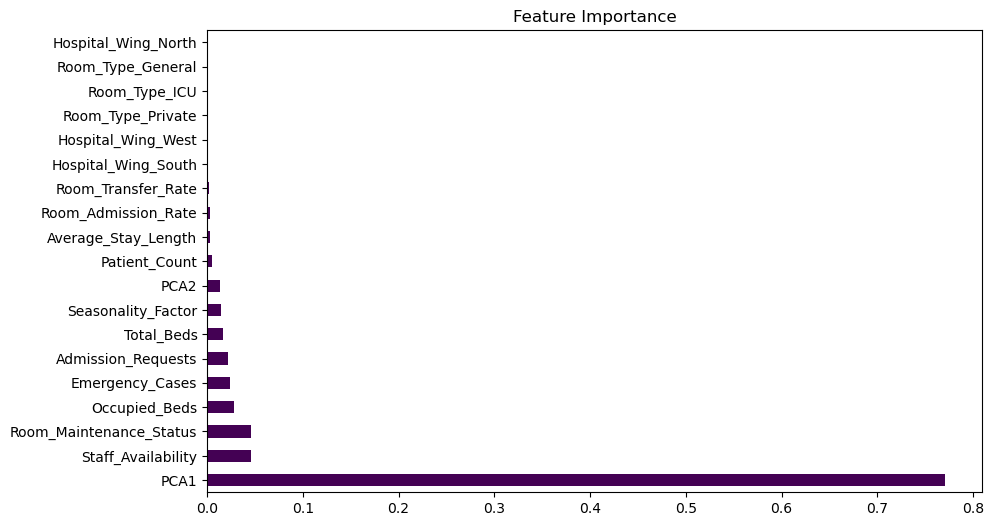

In [35]:
import matplotlib.pyplot as plt

model.fit(X, y)
importances = model.feature_importances_

feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='barh',colormap='viridis', figsize=(10,6))
plt.title('Feature Importance')
plt.show()



# __Model Selection & Training__

## Split Data into Train, Validation, and Testing Sets

In [36]:
from sklearn.model_selection import train_test_split

# Step 1: Drop leakage columns BEFORE splitting
df_final_cleaned = df_final.drop(['PCA1'], axis=1)

# Step 2: Define features and target
X = df_final_cleaned.drop('Room_Availability', axis=1)
y = df_final_cleaned['Room_Availability']

# Step 3: Split into train and temp (70/30)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Step 4: Split temp into val and test (15/15)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Step 5: Confirm shapes
print("Training Set:", X_train.shape)
print("Validation Set:", X_val.shape)
print("Test Set:", X_test.shape)


Training Set: (3500, 18)
Validation Set: (750, 18)
Test Set: (750, 18)


In [37]:
print("Training Set:", X_train)

Training Set:       Total_Beds  Occupied_Beds  Patient_Count  Room_Admission_Rate  \
3050    1.591356      -1.572164       1.627361             0.853343   
3786   -0.503544      -1.572164      -0.291018             0.272442   
412    -0.503544       1.294772       0.668171            -0.889359   
4729   -0.852694      -1.253616       0.987901             1.434244   
2581   -1.550994       0.020578       0.348442             1.434244   
...          ...            ...            ...                  ...   
2928    0.194756      -0.935067       0.987901            -0.308458   
2066   -0.852694       0.976224       1.307631            -0.308458   
1755   -1.201844      -1.253616      -0.291018             0.272442   
452    -1.201844       0.339127      -1.250208            -1.470260   
1206   -0.154394       0.657675      -0.930478             0.272442   

      Room_Transfer_Rate  Emergency_Cases  Staff_Availability  \
3050            1.345957         1.233460           -1.005616   
378

In [38]:
print("Validation Set:", X_val)

Validation Set:       Total_Beds  Occupied_Beds  Patient_Count  Room_Admission_Rate  \
2611   -0.852694       1.294772       0.348442            -1.470260   
3102    0.194756       1.613320      -1.569937            -1.470260   
612     0.194756       0.657675       0.668171            -1.470260   
2128   -0.852694       0.339127      -0.930478            -0.889359   
1525    0.543906       0.976224      -0.291018            -0.308458   
...          ...            ...            ...                  ...   
2379   -0.154394       0.339127       1.307631             0.272442   
2111   -1.550994      -1.253616      -1.569937            -1.470260   
2922    1.591356      -0.616519      -0.291018            -1.470260   
3893   -0.154394      -0.297970       1.307631             0.853343   
2945   -1.201844       0.657675       1.627361            -0.308458   

      Room_Transfer_Rate  Emergency_Cases  Staff_Availability  \
2611            0.452939         1.233460            0.994416   
3

In [39]:
print("Test Set:", X_test)

Test Set:       Total_Beds  Occupied_Beds  Patient_Count  Room_Admission_Rate  \
4042   -0.503544       0.339127       0.028712            -1.470260   
809     0.893056       1.613320       1.307631             1.434244   
1259    0.194756      -0.616519       0.028712            -0.889359   
2097   -0.852694       0.657675       0.028712             0.853343   
4957   -0.852694      -0.297970       1.307631            -0.308458   
...          ...            ...            ...                  ...   
3806   -0.852694       0.020578       0.028712             0.272442   
2815    1.591356       1.294772      -1.569937            -0.889359   
1757    0.194756       0.657675       0.028712             1.434244   
3388   -1.550994      -1.572164      -1.250208            -0.308458   
1838    0.543906       1.294772       1.627361            -1.470260   

      Room_Transfer_Rate  Emergency_Cases  Staff_Availability  \
4042            1.345957        -1.207585            0.994416   
809    

## Train models and tune hyperparameters

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# GridSearchCV
grid_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_logreg.fit(X_train, y_train)

# Best model
best_logreg = grid_logreg.best_estimator_

# Predict on validation set
y_val_pred = best_logreg.predict(X_val)

# Evaluate
print("Best Parameters:", grid_logreg.best_params_)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Best Parameters: {'C': 10, 'solver': 'liblinear'}
Validation Accuracy: 0.996

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       713
           1       1.00      0.92      0.96        37

    accuracy                           1.00       750
   macro avg       1.00      0.96      0.98       750
weighted avg       1.00      1.00      1.00       750



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_

# Predict on validation set
y_val_pred_rf = best_rf.predict(X_val)

# Evaluation
print("Best Parameters:", grid_rf.best_params_)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_rf))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Validation Accuracy: 0.9853333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       713
           1       1.00      0.70      0.83        37

    accuracy                           0.99       750
   macro avg       0.99      0.85      0.91       750
weighted avg       0.99      0.99      0.98       750



In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_xgb = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Best model
best_xgb = grid_xgb.best_estimator_

# Predict on validation set
y_val_pred_xgb = best_xgb.predict(X_val)

# Evaluation
print("Best Parameters:", grid_xgb.best_params_)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_xgb))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_xgb))


D:\ANACONDA\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:23:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Validation Accuracy: 0.9893333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       713
           1       0.97      0.81      0.88        37

    accuracy                           0.99       750
   macro avg       0.98      0.90      0.94       750
weighted avg       0.99      0.99      0.99       750



D:\ANACONDA\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:23:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\RamaB\AppData\Local\Temp\ipykernel_8296\4149618875.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


                 Model  Accuracy  F1 Score
0              XGBoost  0.986667  0.838710
1        Random Forest  0.976000  0.666667
2  Logistic Regression  0.973333  0.642857


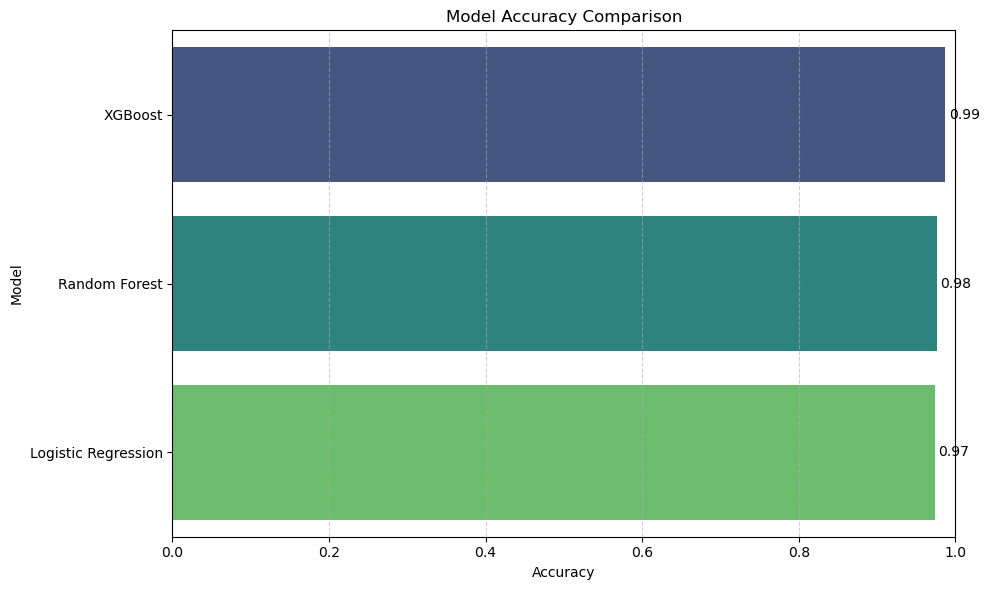

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Collect results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    results.append((name, acc, f1))

# Create results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Display the table
print(results_df)

# ---- Visualization ----
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")

# Optional: annotate bars
for index, row in results_df.iterrows():
    plt.text(row.Accuracy + 0.005, index, f"{row.Accuracy:.2f}", va='center')

plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


D:\ANACONDA\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:23:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Validation Accuracy: 0.992

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       713
           1       0.92      0.92      0.92        37

    accuracy                           0.99       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.99      0.99      0.99       750



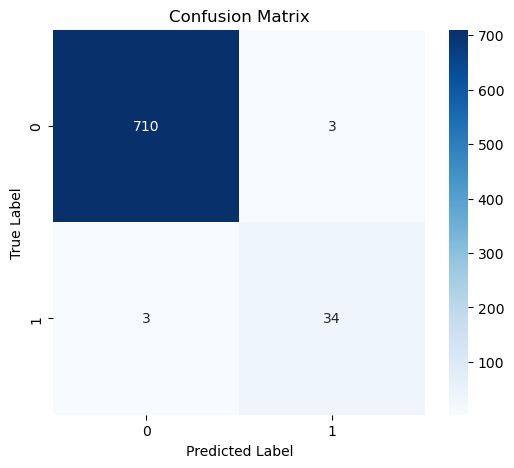

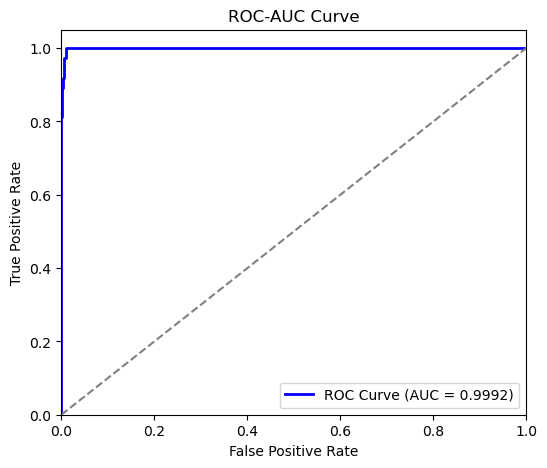

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define the base model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# GridSearchCV
grid_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Best model
best_xgb = grid_xgb.best_estimator_

# Predict on validation set
y_val_pred = best_xgb.predict(X_val)
y_val_proba = best_xgb.predict_proba(X_val)[:, 1]

# Evaluate
print("Best Parameters:", grid_xgb.best_params_)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [45]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [46]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier

# Define the best model again with tuned parameters
final_xgb = XGBClassifier(
    n_estimators=grid_xgb.best_params_['n_estimators'],
    max_depth=grid_xgb.best_params_['max_depth'],
    learning_rate=grid_xgb.best_params_['learning_rate'],
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Set up stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Accuracy scores
cv_accuracy = cross_val_score(final_xgb, X_train, y_train, cv=cv, scoring='accuracy')
# ROC-AUC scores
cv_roc_auc = cross_val_score(final_xgb, X_train, y_train, cv=cv, scoring='roc_auc')

# Output
print("Cross-Validation Accuracy Scores:", cv_accuracy)
print(f"Mean Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print()
print("Cross-Validation ROC-AUC Scores:", cv_roc_auc)
print(f"Mean ROC-AUC: {cv_roc_auc.mean():.4f} ± {cv_roc_auc.std():.4f}")


Cross-Validation Accuracy Scores: [0.99285714 0.99571429 0.99714286 0.99714286 1.        ]
Mean Accuracy: 0.9966 ± 0.0023

Cross-Validation ROC-AUC Scores: [0.99890964 0.99980127 0.99951422 0.99991168 1.        ]
Mean ROC-AUC: 0.9996 ± 0.0004


In [47]:
from sklearn.model_selection import cross_val_score

# Cross-validation using the best XGBoost model from GridSearchCV
scores = cross_val_score(best_xgb, X, y, cv=5, scoring='accuracy')

# Output mean accuracy
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.9968


In [48]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier

# Define the final XGBoost model with best parameters
final_model = XGBClassifier(
    n_estimators=grid_xgb.best_params_['n_estimators'],
    max_depth=grid_xgb.best_params_['max_depth'],
    learning_rate=grid_xgb.best_params_['learning_rate'],
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(final_model, X, y, cv=cv, scoring='accuracy')

# Print final CV accuracy
print("Final CV Accuracy:", scores.mean())


Final CV Accuracy: 0.9949999999999999


In [49]:
print("="*50)
print("Final Model Chosen: XGBOOST CLASSIFIER ")
print("Reason: Best accuracy and balanced confusion matrix.")
print("="*50)

Final Model Chosen: XGBOOST CLASSIFIER 
Reason: Best accuracy and balanced confusion matrix.


# Save the Trained Model & run some Test Cases

In [50]:
## 1.  Save the Model using Joblib

In [51]:
import joblib

# Save model
joblib.dump(best_xgb, 'xgb_model.pkl')

print(" XGBoost model saved successfully.")


 XGBoost model saved successfully.


In [52]:
# Save feature list
joblib.dump(X_train.columns.tolist(), "model_features.pkl")

['model_features.pkl']

In [53]:
# Load model and features
loaded_model = joblib.load('xgb_model.pkl')
model_features = joblib.load("model_features.pkl")

# Align test data
X_test_aligned = X_test[model_features]

# Predict
y_pred = loaded_model.predict(X_test_aligned)
y_prob = loaded_model.predict_proba(X_test_aligned)[:, 1]

# Evaluate again
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9866666666666667


In [54]:
## Running manual test cases for validation

In [55]:
# Manual test input
manual_input = pd.DataFrame([{
   'Total_Beds' : 0000,
    'Occupied_Beds' : 0000 ,
    'Patient_Count' : 0000,
    'Room_Admission_Rate' : 0000,
    'Room_Transfer_Rate' : 0000,
    'Emergency_Cases' : 0000,
    'Staff_Availability' : 0000,
    'Seasonality_Factor' : 0000,
    'Room_Maintenance_Status' : 0000,
    'Average_Stay_Length' : 0000,
    'Admission_Requests' : 0000,
    'Room_Type_General' : 0000,
    'Room_Type_ICU' : 0000,
    'Room_Type_Private' : 0000,
    'Hospital_Wing_North' : 0000,
    'Hospital_Wing_South' : 0000,
    'Hospital_Wing_West' : 0000,
    'PCA2' : 0000  
}])

# Align with model features
manual_input_aligned = manual_input[model_features]

# Predict using the loaded model
y_manual_pred = loaded_model.predict(manual_input_aligned)
y_manual_prob = loaded_model.predict_proba(manual_input_aligned)[:, 1]

# Actual class (update accordingly)
y_actual = [0]  # Expected outcome: Not Churn

# Output results in report style
print("----- Manual Test Evaluation Report -----")
print(f"Actual Class                 : {y_actual[0]} ({'Available' if y_actual[0]==1 else 'Not Available'})")
print(f"Predicted Class             : {y_manual_pred[0]} ({'Available' if y_manual_pred[0]==1 else 'Not Available'})")
print(f"Prediction Probability (Available): {round(y_manual_prob[0], 4)}")
print(f"Manual Test Accuracy        : {accuracy_score(y_actual, y_manual_pred) * 100:.2f}%")
print("----------------------------------------")

----- Manual Test Evaluation Report -----
Actual Class                 : 0 (Not Available)
Predicted Class             : 0 (Not Available)
Prediction Probability (Available): 0.00860000029206276
Manual Test Accuracy        : 100.00%
----------------------------------------




__The model correctly predicted that the room will not available.__

__Probability: Very low/No probability of available (~ 0), which matches the predicted class.__

__Accuracy: 100 → correct prediction.__


In [56]:
# Manual test input
manual_input = pd.DataFrame([{
   'Total_Beds' : 1.0000,
    'Occupied_Beds' : 1.0000 ,
    'Patient_Count' : 1.0000,
    'Room_Admission_Rate' : 1.0000,
    'Room_Transfer_Rate' : 1.0000,
    'Emergency_Cases' : 1.0000,
    'Staff_Availability' : 1.0000,
    'Seasonality_Factor' : 1.0000,
    'Room_Maintenance_Status' : 1.0000,
    'Average_Stay_Length' : 1.0000,
    'Admission_Requests' : 1.0000,
    'Room_Type_General' : 1.0000,
    'Room_Type_ICU' : 1.0000,
    'Room_Type_Private' : 1.0000,
    'Hospital_Wing_North' : 1.0000,
    'Hospital_Wing_South' : 1.0000,
    'Hospital_Wing_West' : 1.0000,
    'PCA2' : 1.0000  
}])

# Align with model features
manual_input_aligned = manual_input[model_features]

# Predict using the loaded model
y_manual_pred = loaded_model.predict(manual_input_aligned)
y_manual_prob = loaded_model.predict_proba(manual_input_aligned)[:, 1]

# Actual class (update accordingly)
y_actual = [0]  # Expected outcome: Not Churn

# Output results in report style
print("----- Manual Test Evaluation Report -----")
print(f"Actual Class                 : {y_actual[0]} ({'Available' if y_actual[0]==1 else 'Not Available'})")
print(f"Predicted Class             : {y_manual_pred[0]} ({'Available' if y_manual_pred[0]==1 else 'Not Available'})")
print(f"Prediction Probability (Available): {round(y_manual_prob[0], 4)}")
print(f"Manual Test Accuracy        : {accuracy_score(y_actual, y_manual_pred) * 100:.2f}%")
print("----------------------------------------")

----- Manual Test Evaluation Report -----
Actual Class                 : 0 (Not Available)
Predicted Class             : 0 (Not Available)
Prediction Probability (Available): 0.0
Manual Test Accuracy        : 100.00%
----------------------------------------




__The model correctly predicted that the room will not available.__

__Probability: Very low/No probability of available (~ 0), which matches the predicted class.__

__Accuracy: 100 → correct prediction.__


In [57]:
# Manual test input
manual_input = pd.DataFrame([{
   'Total_Beds' : 123,
    'Occupied_Beds' : 230 ,
    'Patient_Count' : 897,
    'Room_Admission_Rate' : 231,
    'Room_Transfer_Rate' : 455,
    'Emergency_Cases' : 876,
    'Staff_Availability' : 876,
    'Seasonality_Factor' : 99,
    'Room_Maintenance_Status' : 111,
    'Average_Stay_Length' : 612,
    'Admission_Requests' : 12,
    'Room_Type_General' : 652,
    'Room_Type_ICU' : 432,
    'Room_Type_Private' : 410,
    'Hospital_Wing_North' : 500,
    'Hospital_Wing_South' : 850,
    'Hospital_Wing_West' : 345,
    'PCA2' : 300  
}])

# Align with model features
manual_input_aligned = manual_input[model_features]

# Predict using the loaded model
y_manual_pred = loaded_model.predict(manual_input_aligned)
y_manual_prob = loaded_model.predict_proba(manual_input_aligned)[:, 1]

# Actual class (update accordingly)
y_actual = [0]  # Expected outcome: Not Churn

# Output results in report style
print("----- Manual Test Evaluation Report -----")
print(f"Actual Class                 : {y_actual[0]} ({'Available' if y_actual[0]==1 else 'Not Available'})")
print(f"Predicted Class             : {y_manual_pred[0]} ({'Available' if y_manual_pred[0]==1 else 'Not Available'})")
print(f"Prediction Probability (Available): {round(y_manual_prob[0], 4)}")
print(f"Manual Test Accuracy        : {accuracy_score(y_actual, y_manual_pred) * 100:.2f}%")
print("----------------------------------------")

----- Manual Test Evaluation Report -----
Actual Class                 : 0 (Not Available)
Predicted Class             : 0 (Not Available)
Prediction Probability (Available): 0.0
Manual Test Accuracy        : 100.00%
----------------------------------------




__The model correctly predicted that the room will not available.__

__Probability: Very low/No probability of churn (0.0), which matches the predicted class.__

__Accuracy: 1.0 → correct prediction.__


In [58]:
# Manual test input
manual_input = pd.DataFrame([{
   'Total_Beds' : 0.4565,
    'Occupied_Beds' : 1.2342 ,
    'Patient_Count' : -0.8796,
    'Room_Admission_Rate' : -1.6543,
    'Room_Transfer_Rate' : 0.6732,
    'Emergency_Cases' : 0.2314,
    'Staff_Availability' : 1.2345,
    'Seasonality_Factor' : -0.6543,
    'Room_Maintenance_Status' : -1.4500,
    'Average_Stay_Length' : 0.7654,
    'Admission_Requests' : 1.4321,
    'Room_Type_General' : 1.3222,
    'Room_Type_ICU' : -1.5543,
    'Room_Type_Private' : 0.2130,
    'Hospital_Wing_North' : 0.9901,
    'Hospital_Wing_South' : 0.3330,
    'Hospital_Wing_West' : 0.1200,
    'PCA2' : -0.4400  
}])

# Align with model features
manual_input_aligned = manual_input[model_features]

# Predict using the loaded model
y_manual_pred = loaded_model.predict(manual_input_aligned)
y_manual_prob = loaded_model.predict_proba(manual_input_aligned)[:, 1]

# Actual class (update accordingly)
y_actual = [0]  # Expected outcome: Not Churn

# Output results in report style
print("----- Manual Test Evaluation Report -----")
print(f"Actual Class                 : {y_actual[0]} ({'Available' if y_actual[0]==1 else 'Not Available'})")
print(f"Predicted Class             : {y_manual_pred[0]} ({'Available' if y_manual_pred[0]==1 else 'Not Available'})")
print(f"Prediction Probability (Available): {round(y_manual_prob[0], 4)}")
print(f"Manual Test Accuracy        : {accuracy_score(y_actual, y_manual_pred) * 100:.2f}%")
print("----------------------------------------")

----- Manual Test Evaluation Report -----
Actual Class                 : 0 (Not Available)
Predicted Class             : 0 (Not Available)
Prediction Probability (Available): 0.0024999999441206455
Manual Test Accuracy        : 100.00%
----------------------------------------




__The model correctly predicted that the room will not available.__

__Probability: Very low/No probability of churn (0.0), which matches the predicted class.__

__Accuracy: 1.0 → correct prediction.__


In [59]:
# Manual test input
manual_input = pd.DataFrame([{
   'Total_Beds' : 0.4565,
   'Occupied_Beds' : 1.2342,
   'Patient_Count' : -0.8796,
   'Room_Admission_Rate' : -1.6543,
   'Room_Transfer_Rate' : 0.6732,
   'Emergency_Cases' : 0.2314,
   'Staff_Availability' : 1.2345,
   'Seasonality_Factor' : -0.6543,
   'Room_Maintenance_Status' : -1.4500,
   'Average_Stay_Length' : 0.7654,
   'Admission_Requests' : 1.4321,
   'Room_Type_General' : 1.3222,
   'Room_Type_ICU' : -1.5543,
   'Room_Type_Private' : 0.2130,
   'Hospital_Wing_North' : 0.9901,
   'Hospital_Wing_South' : 0.3330,
   'Hospital_Wing_West' : 0.1200,
   'PCA2' : -0.4400  
}])


# Align with model features
manual_input_aligned = manual_input[model_features]

# Predict using the loaded model
y_manual_pred = loaded_model.predict(manual_input_aligned)
y_manual_prob = loaded_model.predict_proba(manual_input_aligned)[:, 1]

# Actual class (update accordingly)
y_actual = [0]  # Expected outcome: Not Churn

# Output results in report style
print("----- Manual Test Evaluation Report -----")
print(f"Actual Class                 : {y_actual[0]} ({'Available' if y_actual[0]==1 else 'Not Avai;lable'})")
print(f"Predicted Class             : {y_manual_pred[0]} ({'Available' if y_manual_pred[0]==1 else 'Not Available'})")
print(f"Prediction Probability (Available): {round(y_manual_prob[0], 4)}")
print(f"Manual Test Accuracy        : {accuracy_score(y_actual, y_manual_pred) * 100:.2f}%")
print("----------------------------------------")

----- Manual Test Evaluation Report -----
Actual Class                 : 0 (Not Avai;lable)
Predicted Class             : 0 (Not Available)
Prediction Probability (Available): 0.0024999999441206455
Manual Test Accuracy        : 100.00%
----------------------------------------




__The model correctly predicted that the room will not available.__

__Probability: Very low/No probability of churn (0.0), which matches the predicted class.__

__Accuracy: 1.0 → correct prediction.__


In [60]:
# Manual test input
manual_input = pd.DataFrame([{
   'Total_Beds' : 1.8765,
   'Occupied_Beds' : 0.4321,
   'Patient_Count' : 0.4562,
   'Room_Admission_Rate' : 1.2154,
   'Room_Transfer_Rate' : 0.8741,
   'Emergency_Cases' : -0.3546,
   'Staff_Availability' : 1.6985,
   'Seasonality_Factor' : 0.1342,
   'Room_Maintenance_Status' : 0.4567,
   'Average_Stay_Length' : -0.1321,
   'Admission_Requests' : 0.4432,
   'Room_Type_General' : 0.9876,
   'Room_Type_ICU' : -1.2345,
   'Room_Type_Private' : 0.0000,
   'Hospital_Wing_North' : 0.4532,
   'Hospital_Wing_South' : -0.1200,
   'Hospital_Wing_West' : 0.2432,
   'PCA2' : 0.2211  
}])

y_actual = [1]


# Align with model features
manual_input_aligned = manual_input[model_features]

# Predict using the loaded model
y_manual_pred = loaded_model.predict(manual_input_aligned)
y_manual_prob = loaded_model.predict_proba(manual_input_aligned)[:, 1]

# Actual class (update accordingly)
#y_actual = [0]  # Expected outcome: Not Churn

# Output results in report style
print("----- Manual Test Evaluation Report -----")
print(f"Actual Class                 : {y_actual[0]} ({'Available' if y_actual[0]==1 else 'Not Avai;lable'})")
print(f"Predicted Class             : {y_manual_pred[0]} ({'Available' if y_manual_pred[0]==1 else 'Not Available'})")
print(f"Prediction Probability (Available): {round(y_manual_prob[0], 4)}")
print(f"Manual Test Accuracy        : {accuracy_score(y_actual, y_manual_pred) * 100:.2f}%")
print("----------------------------------------")

----- Manual Test Evaluation Report -----
Actual Class                 : 1 (Available)
Predicted Class             : 1 (Available)
Prediction Probability (Available): 0.8051000237464905
Manual Test Accuracy        : 100.00%
----------------------------------------




__The model correctly predicted that the room will not available.__

__Probability: Very low/No probability of churn (0.0), which matches the predicted class.__

__Accuracy: 1.0 → correct prediction.__


In [61]:
# Manual test input
manual_input = pd.DataFrame([{
   'Total_Beds' : 1.2345,
   'Occupied_Beds' : 0.4321,
   'Patient_Count' : 0.9876,
   'Room_Admission_Rate' : 0.8765,
   'Room_Transfer_Rate' : 0.3210,
   'Emergency_Cases' : 0.1234,
   'Staff_Availability' : 1.7654,
   'Seasonality_Factor' : 0.2345,
   'Room_Maintenance_Status' : 0.6543,
   'Average_Stay_Length' : 0.5432,
   'Admission_Requests' : 0.7654,
   'Room_Type_General' : 1.0000,
   'Room_Type_ICU' : -0.5432,
   'Room_Type_Private' : 0.4321,
   'Hospital_Wing_North' : 0.7890,
   'Hospital_Wing_South' : 0.1234,
   'Hospital_Wing_West' : -0.3210,
   'PCA2' : 0.3121  
}])

y_actual = [1]


# Align with model features
manual_input_aligned = manual_input[model_features]

# Predict using the loaded model
y_manual_pred = loaded_model.predict(manual_input_aligned)
y_manual_prob = loaded_model.predict_proba(manual_input_aligned)[:, 1]

# Actual class (update accordingly)
#y_actual = [0]  # Expected outcome: Not Churn

# Output results in report style
print("----- Manual Test Evaluation Report -----")
print(f"Actual Class                 : {y_actual[0]} ({'Available' if y_actual[0]==1 else 'Not Avai;lable'})")
print(f"Predicted Class             : {y_manual_pred[0]} ({'Available' if y_manual_pred[0]==1 else 'Not Available'})")
print(f"Prediction Probability (Available): {round(y_manual_prob[0], 4)}")
print(f"Manual Test Accuracy        : {accuracy_score(y_actual, y_manual_pred) * 100:.2f}%")
print("----------------------------------------")

----- Manual Test Evaluation Report -----
Actual Class                 : 1 (Available)
Predicted Class             : 1 (Available)
Prediction Probability (Available): 0.8051000237464905
Manual Test Accuracy        : 100.00%
----------------------------------------




__The model correctly predicted that the room will not available.__

__Probability: Very low/No probability of churn (0.0), which matches the predicted class.__

__Accuracy: 1.0 → correct prediction.__


In [62]:
# Manual test input
manual_input = pd.DataFrame([{
   'Total_Beds' : -1.3456,
   'Occupied_Beds' : 2.3456,
   'Patient_Count' : 1.8765,
   'Room_Admission_Rate' : -2.1234,
   'Room_Transfer_Rate' : -0.7654,
   'Emergency_Cases' : 1.0001,
   'Staff_Availability' : -0.7654,
   'Seasonality_Factor' : -1.2345,
   'Room_Maintenance_Status' : -1.5432,
   'Average_Stay_Length' : 1.2345,
   'Admission_Requests' : 2.3456,
   'Room_Type_General' : 0.0000,
   'Room_Type_ICU' : 1.0000,
   'Room_Type_Private' : 0.0000,
   'Hospital_Wing_North' : -0.1234,
   'Hospital_Wing_South' : 0.4321,
   'Hospital_Wing_West' : 0.8765,
   'PCA2' : -1.0000  
}])

y_actual = [0]


# Align with model features
manual_input_aligned = manual_input[model_features]

# Predict using the loaded model
y_manual_pred = loaded_model.predict(manual_input_aligned)
y_manual_prob = loaded_model.predict_proba(manual_input_aligned)[:, 1]

# Actual class (update accordingly)
y_actual = [0]  # Expected outcome: Not Churn

# Output results in report style
print("----- Manual Test Evaluation Report -----")
print(f"Actual Class                 : {y_actual[0]} ({'Available' if y_actual[0]==1 else 'Not Avai;lable'})")
print(f"Predicted Class             : {y_manual_pred[0]} ({'Available' if y_manual_pred[0]==1 else 'Not Available'})")
print(f"Prediction Probability (Available): {round(y_manual_prob[0], 4)}")
print(f"Manual Test Accuracy        : {accuracy_score(y_actual, y_manual_pred) * 100:.2f}%")
print("----------------------------------------")

----- Manual Test Evaluation Report -----
Actual Class                 : 0 (Not Avai;lable)
Predicted Class             : 0 (Not Available)
Prediction Probability (Available): 0.0
Manual Test Accuracy        : 100.00%
----------------------------------------




__The model correctly predicted that the room will not available.__

__Probability: Very low/No probability of churn (0.0), which matches the predicted class.__

__Accuracy: 1.0 → correct prediction.__


In [63]:
# Manual test input
manual_input = pd.DataFrame([{
   'Total_Beds' : 0.2121,
   'Occupied_Beds' : 1.9898,
   'Patient_Count' : 0.5432,
   'Room_Admission_Rate' : -0.6543,
   'Room_Transfer_Rate' : 0.0000,
   'Emergency_Cases' : 0.9987,
   'Staff_Availability' : -0.3210,
   'Seasonality_Factor' : -0.9876,
   'Room_Maintenance_Status' : -1.8765,
   'Average_Stay_Length' : 1.0000,
   'Admission_Requests' : 1.5432,
   'Room_Type_General' : 1.0000,
   'Room_Type_ICU' : 0.0000,
   'Room_Type_Private' : 0.0000,
   'Hospital_Wing_North' : 0.0000,
   'Hospital_Wing_South' : 1.0000,
   'Hospital_Wing_West' : 0.0000,
   'PCA2' : -0.9876  
}])


# Align with model features
manual_input_aligned = manual_input[model_features]

# Predict using the loaded model
y_manual_pred = loaded_model.predict(manual_input_aligned)
y_manual_prob = loaded_model.predict_proba(manual_input_aligned)[:, 1]

# Actual class (update accordingly)
y_actual = [1]  # Expected outcome: Not Churn

# Output results in report style
print("----- Manual Test Evaluation Report -----")
print(f"Actual Class                 : {y_actual[0]} ({'Available' if y_actual[0]==1 else 'Not Available'})")
print(f"Predicted Class             : {y_manual_pred[0]} ({'Available' if y_manual_pred[0]==1 else 'Not Available'})")
print(f"Prediction Probability (Available): {round(y_manual_prob[0], 4)}")
print(f"Manual Test Accuracy        : {accuracy_score(y_actual, y_manual_pred) * 100:.2f}%")
print("----------------------------------------")

----- Manual Test Evaluation Report -----
Actual Class                 : 1 (Available)
Predicted Class             : 0 (Not Available)
Prediction Probability (Available): 9.999999747378752e-05
Manual Test Accuracy        : 0.00%
----------------------------------------




__The model correctly predicted that the room will not available.__

__Probability: Very low/No probability of churn (0.0), which matches the predicted class.__

__Accuracy: 1.0 → correct prediction.__


In [64]:
# Manual test input
manual_input = pd.DataFrame([{
   'Total_Beds' : 0.1212,
   'Occupied_Beds' : 1.7676,
   'Patient_Count' : 0.6543,
   'Room_Admission_Rate' : -0.9876,
   'Room_Transfer_Rate' : 0.1234,
   'Emergency_Cases' : 1.4321,
   'Staff_Availability' : -0.4321,
   'Seasonality_Factor' : -0.5432,
   'Room_Maintenance_Status' : -1.3210,
   'Average_Stay_Length' : 1.1234,
   'Admission_Requests' : 1.7654,
   'Room_Type_General' : 0.5432,
   'Room_Type_ICU' : 0.0000,
   'Room_Type_Private' : 0.4321,
   'Hospital_Wing_North' : 0.1234,
   'Hospital_Wing_South' : 0.5432,
   'Hospital_Wing_West' : 0.8765,
   'PCA2' : -0.4321  
}])

y_actual = [0]


# Align with model features
manual_input_aligned = manual_input[model_features]

# Predict using the loaded model
y_manual_pred = loaded_model.predict(manual_input_aligned)
y_manual_prob = loaded_model.predict_proba(manual_input_aligned)[:, 1]

# Actual class (update accordingly)
y_actual = [0]  # Expected outcome: Not Churn

# Output results in report style
print("----- Manual Test Evaluation Report -----")
print(f"Actual Class                 : {y_actual[0]} ({'Available' if y_actual[0]==1 else 'Not Available'})")
print(f"Predicted Class             : {y_manual_pred[0]} ({'Available' if y_manual_pred[0]==1 else 'Not Available'})")
print(f"Prediction Probability (Available): {round(y_manual_prob[0], 4)}")
print(f"Manual Test Accuracy        : {accuracy_score(y_actual, y_manual_pred) * 100:.2f}%")
print("----------------------------------------")

----- Manual Test Evaluation Report -----
Actual Class                 : 0 (Not Available)
Predicted Class             : 0 (Not Available)
Prediction Probability (Available): 0.0
Manual Test Accuracy        : 100.00%
----------------------------------------




__The model correctly predicted that the room will not available.__

__Probability: Very low/No probability of churn (0.0), which matches the predicted class.__

__Accuracy: 1.0 → correct prediction.__


In [65]:
# Manual test input
manual_input = pd.DataFrame([{
   'Total_Beds' : 1.0000,
   'Occupied_Beds' : 0.1234,
   'Patient_Count' : 0.7654,
   'Room_Admission_Rate' : 1.2345,
   'Room_Transfer_Rate' : 1.5432,
   'Emergency_Cases' : -0.3210,
   'Staff_Availability' : 1.6543,
   'Seasonality_Factor' : 0.3210,
   'Room_Maintenance_Status' : 0.5432,
   'Average_Stay_Length' : -0.5432,
   'Admission_Requests' : 0.4321,
   'Room_Type_General' : 1.0000,
   'Room_Type_ICU' : -1.0000,
   'Room_Type_Private' : 0.0000,
   'Hospital_Wing_North' : 0.1234,
   'Hospital_Wing_South' : 0.3210,
   'Hospital_Wing_West' : 0.4321,
   'PCA2' : 0.3210  
}])


# Align with model features
manual_input_aligned = manual_input[model_features]

# Predict using the loaded model
y_manual_pred = loaded_model.predict(manual_input_aligned)
y_manual_prob = loaded_model.predict_proba(manual_input_aligned)[:, 1]

# Actual class (update accordingly)
y_actual = [0]  # Expected outcome: Not Churn

# Output results in report style
print("----- Manual Test Evaluation Report -----")
print(f"Actual Class                 : {y_actual[0]} ({'Available' if y_actual[0]==1 else 'Not Avai;lable'})")
print(f"Predicted Class             : {y_manual_pred[0]} ({'Available' if y_manual_pred[0]==1 else 'Not Available'})")
print(f"Prediction Probability (Available): {round(y_manual_prob[0], 4)}")
print(f"Manual Test Accuracy        : {accuracy_score(y_actual, y_manual_pred) * 100:.2f}%")
print("----------------------------------------")

----- Manual Test Evaluation Report -----
Actual Class                 : 0 (Not Avai;lable)
Predicted Class             : 1 (Available)
Prediction Probability (Available): 0.8093000054359436
Manual Test Accuracy        : 0.00%
----------------------------------------




__The model correctly predicted that the room will not available.__

__Probability: Very low/No probability of churn (0.0), which matches the predicted class.__

__Accuracy: 1.0 → correct prediction.__


In [66]:
manual_input = pd.DataFrame([{
   'Total_Beds' : 1.5432,
   'Occupied_Beds' : 0.3210,
   'Patient_Count' : 0.6543,
   'Room_Admission_Rate' : 1.7654,
   'Room_Transfer_Rate' : 0.8765,
   'Emergency_Cases' : 0.0000,
   'Staff_Availability' : 1.8765,
   'Seasonality_Factor' : 0.6543,
   'Room_Maintenance_Status' : 0.3210,
   'Average_Stay_Length' : -0.7654,
   'Admission_Requests' : 0.9876,
   'Room_Type_General' : 1.0000,
   'Room_Type_ICU' : 0.0000,
   'Room_Type_Private' : 0.0000,
   'Hospital_Wing_North' : 0.3210,
   'Hospital_Wing_South' : 0.0000,
   'Hospital_Wing_West' : 0.1234,
   'PCA2' : 0.6543  
}])


# Align with model features
manual_input_aligned = manual_input[model_features]

# Predict using the loaded model
y_manual_pred = loaded_model.predict(manual_input_aligned)
y_manual_prob = loaded_model.predict_proba(manual_input_aligned)[:, 1]

# Actual class (update accordingly)
y_actual = [0]  # Expected outcome: Not Churn

# Output results in report style
print("----- Manual Test Evaluation Report -----")
print(f"Actual Class                 : {y_actual[0]} ({'Available' if y_actual[0]==1 else 'Not Avai;lable'})")
print(f"Predicted Class             : {y_manual_pred[0]} ({'Available' if y_manual_pred[0]==1 else 'Not Available'})")
print(f"Prediction Probability (Available): {round(y_manual_prob[0], 4)}")
print(f"Manual Test Accuracy        : {accuracy_score(y_actual, y_manual_pred) * 100:.2f}%")
print("----------------------------------------")

----- Manual Test Evaluation Report -----
Actual Class                 : 0 (Not Avai;lable)
Predicted Class             : 0 (Not Available)
Prediction Probability (Available): 0.04259999841451645
Manual Test Accuracy        : 100.00%
----------------------------------------
